# Premier League Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("premier_league_data.csv")

The dataset comes from the Fantasy Football game _Biwenger_ and contains information about all Premier League players in the 2024-2025 season.  
It includes **616 players** and **9 columns**, capturing both real life performance and market value metrics.

## Feature Glossary  
- **Team**: The club the player belongs to.  
- **Jugador**: Name of the player (not used directly in models, only as identifier).  
- **Posición**: Role on the pitch (e.g., goalkeeper, defender, midfielder, forward).  
- **Puntos**: Total points scored by the player (performance measure).  
- **Precio**: Market price of the player in the fantasy game. Driven by supply and demand: if many users buy a player, price goes up; if many sell, price goes down.   
- **PJ (Partidos Jugados)**: Number of matches played.  
- **Casa**: Number of matches played at home.  
- **Fuera**: Number of matches played away.  
- **Media**: Average points per match.

In [3]:
df.head()

,Equipo,Jugador,Posición,Puntos,Precio,PJ,Casa,Fuera,Media
0,Liverpool,Salah,Delantero,416,18120000,38,19,19,10.95
1,Chelsea,Cole Palmer,Centrocampista,340,17520000,37,19,18,9.19
2,Brentford FC,Mbeumo,Delantero,321,15670000,38,19,19,8.45
3,Manchester United,Bruno Fernandes,Centrocampista,309,15490000,36,18,18,8.58
4,Wolverhampton,Matheus Cunha,Delantero,299,14050000,33,16,17,9.06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Equipo    505 non-null    object 
 1   Jugador   505 non-null    object 
 2   Posición  505 non-null    object 
 3   Puntos    505 non-null    int64  
 4   Precio    505 non-null    int64  
 5   PJ        505 non-null    int64  
 6   Casa      505 non-null    int64  
 7   Fuera     505 non-null    int64  
 8   Media     505 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 35.6+ KB


In [5]:
df.describe()

,Puntos,Precio,PJ,Casa,Fuera,Media
count,505.000000,5.050000e+02,505.000000,505.000000,505.000000,505.000000
mean,91.586139,2.798990e+06,18.833663,9.441584,9.392079,3.661525
std,80.605872,2.925560e+06,13.552809,6.863540,6.809244,2.166140
min,0.000000,2.900000e+05,0.000000,0.000000,0.000000,0.000000
25%,13.000000,8.000000e+05,4.000000,2.000000,2.000000,2.520000
50%,80.000000,1.900000e+06,20.000000,10.000000,10.000000,4.040000
75%,153.000000,3.510000e+06,32.000000,16.000000,16.000000,5.080000
max,416.000000,1.812000e+07,38.000000,19.000000,19.000000,10.950000


## Research Questions and Methods

### Question 1  
**Is it possible to estimate a player’s price based on their position, team, and performance (points)?**  
- **Possible features**: `Posición`, `Team`, `Puntos`, `PJ`.  
- **Target**: `Precio` (continuous).  
- **Best algorithm**:  
  - Linear Regression (baseline).  
  - Random Forest Regressor (if nonlinear effects are relevant).  
- **Useful insights / conclusions**:  
  - Helps understand which factors most influence player prices.  
  - Can highlight if price is mostly performance-driven or influenced by team/position.  
  - Useful for predicting price trends before the gameweek.  

---

### Question 2  
**Is it possible to discover natural clusters of players without using position labels?**  
- **Possible features**: `Precio`, `Puntos`, `Media`, `PJ`.  
- **Target**: None (unsupervised).  
- **Best algorithm**:  
  - K-Means clustering (with feature scaling).  
    - Use the **elbow method** to determine the optimal number of clusters.  
  - Hierarchical clustering (suitable for small datasets).  
- **Useful insights / conclusions**:  
  - Can reveal hidden groupings of players based on performance and price.  
  - Helps identify under- or over-valued players relative to their cluster.  
  - Can inform transfer or selection strategies in fantasy football.  

---

### Question 3  
**Is price (with other features, excluding points) a good indicator of whether a player performs above or below average?**  
- **Possible features**: `Precio`, `Team`, `PJ`, `Casa`, `Fuera` (excluding `Puntos`).  
- **Target**: Binary label = 1 if `Puntos > Media`, else 0.  
- **Best algorithm**:  
  - Logistic Regression (to assess statistical significance).  
  - Random Forest Classifier (to capture nonlinear relationships).  
- **Useful insights / conclusions**:  
  - Determines if fantasy users’ buying/selling behavior (reflected in price) predicts actual performance.  
  - Can reveal if high-priced players are truly better performers or just popular.  
  - Helps validate the efficiency of the fantasy market.  


In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Load dataset (replace path with actual file)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Equipo    505 non-null    object 
 1   Jugador   505 non-null    object 
 2   Posición  505 non-null    object 
 3   Puntos    505 non-null    int64  
 4   Precio    505 non-null    int64  
 5   PJ        505 non-null    int64  
 6   Casa      505 non-null    int64  
 7   Fuera     505 non-null    int64  
 8   Media     505 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 35.6+ KB


In [8]:
avg = df["Puntos"].mean()
print("Average:", avg)

Average: 91.58613861386138


In [9]:
df["Puntos"].max() 

416

In [10]:
df["Puntos"].min()

0

In [11]:
ud=df["Puntos"]-avg
ud


0      324.413861
1      248.413861
2      229.413861
3      217.413861
4      207.413861
          ...    
500    -91.586139
501    -91.586139
502    -91.586139
503    -91.586139
504    -91.586139
Name: Puntos, Length: 505, dtype: float64

In [12]:
# Preview
print(df.head())
# Select useful features for clustering
data = df[['Precio', 'Puntos', 'Media', "PJ"]].dropna()
# Convert published_date to hour of day (feature engineering)
#data['published_date'] = pd.to_datetime(data['published_date'])
#data['hour'] = data['published_date'].dt.hour
# Keep only features for clustering
X = data[['Precio', 'Puntos', 'Media', "PJ"]]

              Equipo          Jugador        Posición  Puntos    Precio  PJ  \
0          Liverpool            Salah       Delantero     416  18120000  38   
1            Chelsea      Cole Palmer  Centrocampista     340  17520000  37   
2       Brentford FC           Mbeumo       Delantero     321  15670000  38   
3  Manchester United  Bruno Fernandes  Centrocampista     309  15490000  36   
4      Wolverhampton    Matheus Cunha       Delantero     299  14050000  33   

   Casa  Fuera  Media  
0    19     19  10.95  
1    19     18   9.19  
2    19     19   8.45  
3    18     18   8.58  
4    16     17   9.06  


In [13]:
# One-hot encode categorical feature
#incident_type = pd.get_dummies(df['issue_reported'], prefix='issue')
# Combine with lat/lon/hour
X = pd.concat([data[['Precio', 'Puntos', 'Media', "PJ"]]], axis=1)
# Scale everything
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Choose number of clusters (k)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to data
data['cluster'] = clusters

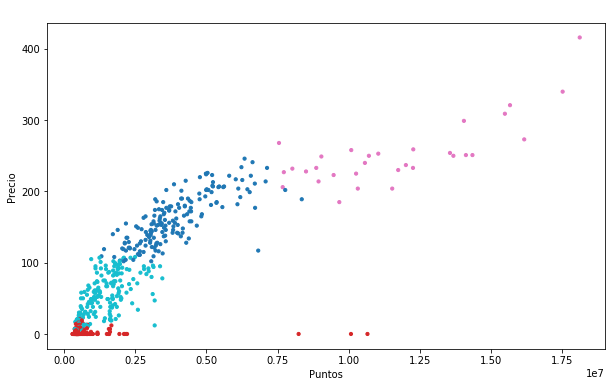

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(data['Precio'], data['Puntos'], c=data['cluster'], cmap='tab10', s=10)
plt.xlabel("Puntos")
plt.ylabel("Precio")
plt.title(" ")
plt.show()

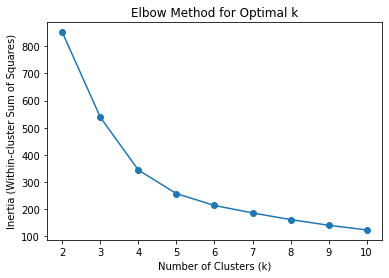

In [18]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()